<h1 align=center><font size = 5>Wine Type Classification with K-NN and Decision Tree</font></h1>

<br>

<img src="https://learn.winecoolerdirect.com/wp-content/uploads/2015/07/red-wine.jpg" alt="wine">

<small>Picture Source:<a href="https://learn.winecoolerdirect.com/red-wine/"> Wine Cooler Direct</a></small>

<br>

<h2>Data Set Information:</h2>

<p>The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: <a href="https://www.vinhoverde.pt/en/">Web Link</a> or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only <i>physicochemical</i> (inputs) and <i>sensory</i> (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as <i>classification</i> or <i>regression</i> tasks. The <i>classes</i> are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). <i>Outlier detection algorithms</i> could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.</p>

<br>

<h2>Acknowledgements</h2>

<p>This dataset has been referred from <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality">archive.ics.uci.edu</a>.</p>

<br>

<h2>Relevant Papers</h2>

<p><b>P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.</b> <i>Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.</i></p>

Available at: <a href="https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub">sciencedirect.com</a></p>

<br>

<h2>Keywords</h2> 

<ul>
	<li>Wine</li>
	<li>Machine Learning</li>
	<li>Wine Type Classification</li>
	<li>K-Nearest Neighbors (K-NN)</li>
	<li>Decision Tree</li>
  <li>Grid Search</li>
</ul> 

<br>

<h1>Objective for this Notebook</h1>

<p>Within the scope of this project, first we understand the Dataset & cleanup (if required). After that, we had tried to build classification model to predict wine type with <i>K-Nearest Neighbors (K-NN)</i> and <i>Decision tree</i>.</p>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#importing_libraries">Importing Libraries</a></li>
<li><a href="https://#data_preprocessing">Data Preprocessing</a></li>
<li><a href="https://#classification">Classification</a></li>
<br>

<p></p>
Estimated Time Needed: <strong>20 min</strong>
</div>

<br>

<a id="importing_libraries"></a>

<h2 align=center>Importing Libraries</h2>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import pickle 
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Function taken from 'Custom Models, Layers, and Loss Functions with TensorFlow' course.
# https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow

def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(False)
    cax = ax.matshow(cm)
    plt.title(title)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

<br>

<a id="data_preprocessing"></a>

<h2 align=center>Data Preprocessing</h2>

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2023-01-07 20:35:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K   317KB/s    in 0.3s    

2023-01-07 20:35:39 (317 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2023-01-07 20:35:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[===================>] 258.23K   499KB/s    in 0.5s    

2023-01-07 20:35:41 (499 KB/s) - ‘winequality-white.csv’ saved [264426/264426]



In [ ]:
df_red = pd.read_csv('/content/winequality-red.csv', sep=';')

In [ ]:
df_white = pd.read_csv('/content/winequality-white.csv', sep=';')

<p>As we can see from the bottom, quality dataset is imbalanced. To solve this problem, we can make 3 different variables. Quality between 3-5 are low, 6-7 are mid, 8-9 are high quality. For low quality wines, we can call them as 0, for mid quality 1 and lastly for the good quality wines we can call them as 2.</p>

In [ ]:
df_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df_white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [ ]:
bins = [0, 5.5, 7.5, 10] # 3-5 are low(0), 6-7 are mid(1), 8-9 are high quality(2)
labels = [0, 1, 2]
df_red['quality'] = pd.cut(df_red['quality'], bins=bins, labels=labels)
df_white['quality'] = pd.cut(df_white['quality'], bins=bins, labels=labels)

In [ ]:
df_white["is_red"] = 0

In [ ]:
df_red["is_red"] = 1

<p>Now, we can concat our two dataframes. We can do it with following code:</p>

In [ ]:
df = pd.concat([df_red, df_white], ignore_index=True)
df = df.iloc[np.random.permutation(len(df))] # Shuffle them
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
4725,7.2,0.170,0.37,6.9,0.059,47.0,128.0,0.99322,3.08,0.46,11.0,1,0
435,12.3,0.390,0.63,2.3,0.091,6.0,18.0,1.00040,3.16,0.49,9.5,0,1
5544,6.2,0.270,0.32,6.3,0.048,47.0,159.0,0.99282,3.21,0.60,11.0,1,0
3429,7.7,0.440,0.24,11.2,0.031,41.0,167.0,0.99480,3.12,0.43,11.3,1,0
1209,6.2,0.390,0.43,2.0,0.071,14.0,24.0,0.99428,3.45,0.87,11.2,1,1
1245,7.4,0.550,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.5,0,1
2031,7.4,0.155,0.34,2.3,0.045,73.5,214.0,0.99340,3.18,0.61,9.9,1,0
4668,7.0,0.530,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5,2,0
2798,7.4,0.250,0.37,6.9,0.020,14.0,93.0,0.99390,3.00,0.48,10.7,1,0
5336,7.1,0.210,0.72,1.6,0.167,65.0,120.0,0.99324,2.97,0.51,9.2,0,0


In [ ]:
df.shape

(6497, 13)

In [ ]:
print("Number of NaN values: {}.".format(df.isnull().sum().sum()))
print("Number of duplicated rows: {}.".format(df.duplicated().sum()))
print("\nDropping duplicated rows...\n")

dp = df[df.duplicated(keep=False)]
df.drop_duplicates(inplace= True)
print("Number of duplicated rows: {}.".format(df.duplicated().sum()))

Number of NaN values: 0.
Number of duplicated rows: 1177.

Dropping duplicated rows...

Number of duplicated rows: 0.


In [ ]:
df.shape

(5320, 13)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5320.0,7.215179,1.319671,3.80000,6.4000,7.00000,7.70000,15.90000
volatile acidity,5320.0,0.344130,0.168248,0.08000,0.2300,0.30000,0.41000,1.58000
citric acid,5320.0,0.318494,0.147157,0.00000,0.2400,0.31000,0.40000,1.66000
residual sugar,5320.0,5.048477,4.500180,0.60000,1.8000,2.70000,7.50000,65.80000
chlorides,5320.0,0.056690,0.036863,0.00900,0.0380,0.04700,0.06600,0.61100
free sulfur dioxide,5320.0,30.036654,17.805045,1.00000,16.0000,28.00000,41.00000,289.00000
total sulfur dioxide,5320.0,114.109023,56.774223,6.00000,74.0000,116.00000,153.25000,440.00000
density,5320.0,0.994535,0.002966,0.98711,0.9922,0.99465,0.99677,1.03898
pH,5320.0,3.224664,0.160379,2.72000,3.1100,3.21000,3.33000,4.01000
sulphates,5320.0,0.533357,0.149743,0.22000,0.4300,0.51000,0.60000,2.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 4725 to 1528
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5320 non-null   float64 
 1   volatile acidity      5320 non-null   float64 
 2   citric acid           5320 non-null   float64 
 3   residual sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free sulfur dioxide   5320 non-null   float64 
 6   total sulfur dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  quality               5320 non-null   category
 12  is_red                5320 non-null   int64   
dtypes: category(1), float64(11), int64(1)
memory usage: 545.6 KB


Text(0, 0.5, 'Frequency')

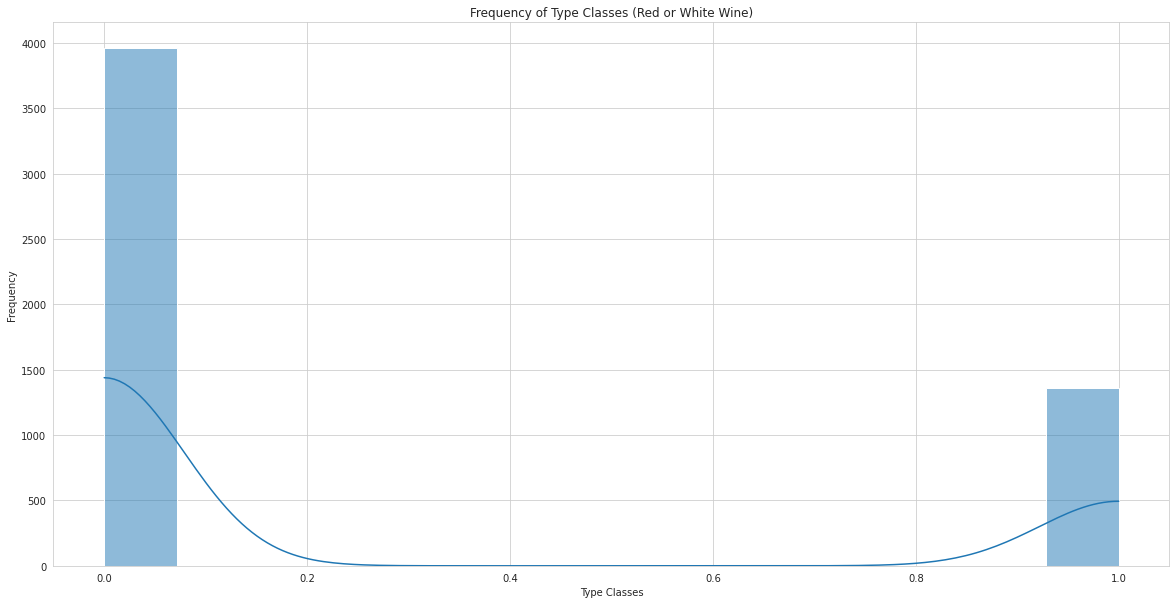

In [ ]:
plt.figure(figsize = (20, 10))
sns.set_style('whitegrid')
sns.histplot(data=df['is_red'], kde=True)
plt.title("Frequency of Type Classes (Red or White Wine)")
plt.xlabel("Type Classes")
plt.ylabel("Frequency")

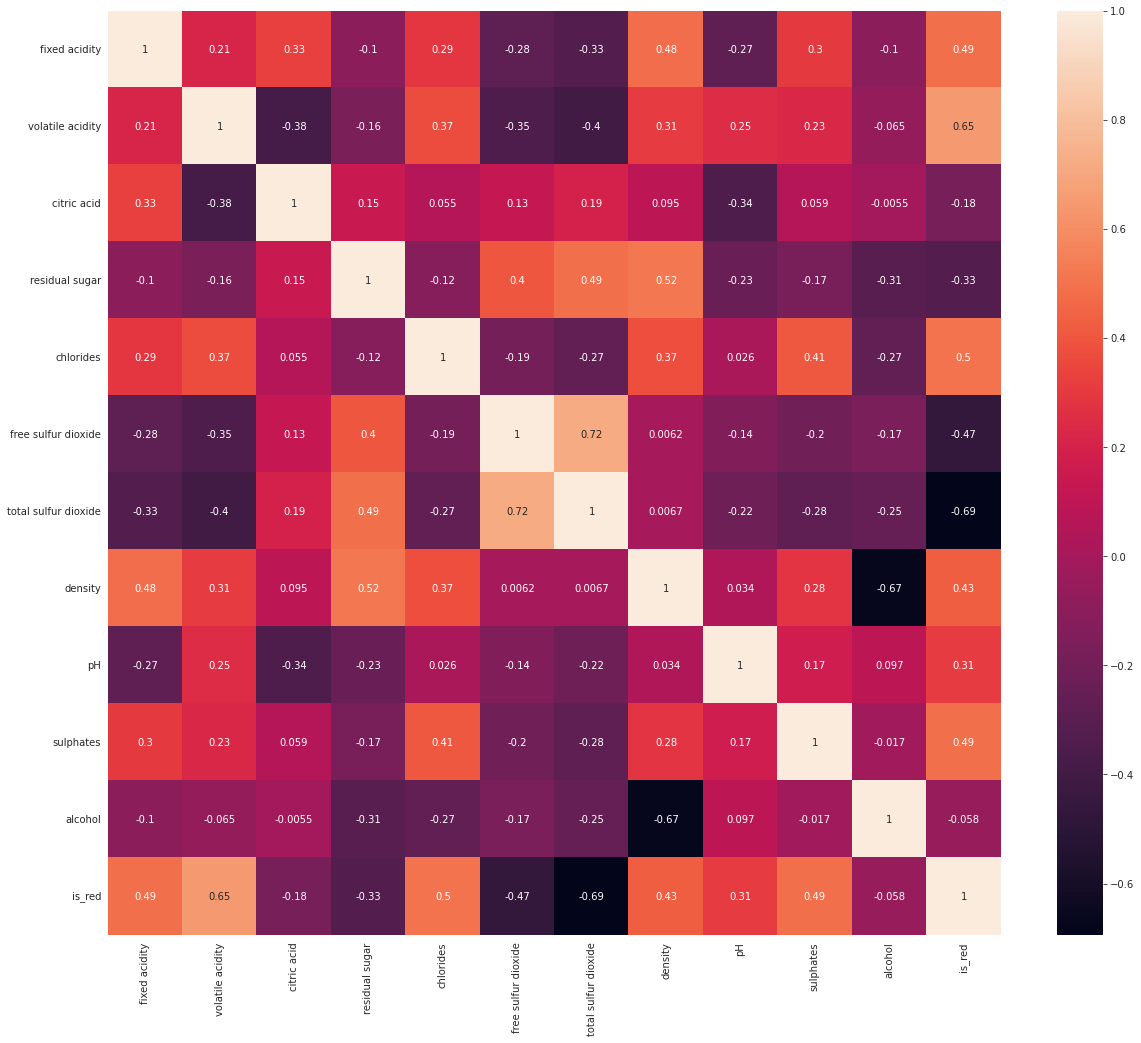

In [ ]:
plt.figure(figsize = (20, 17))
sns.heatmap(df.corr(), annot=True)

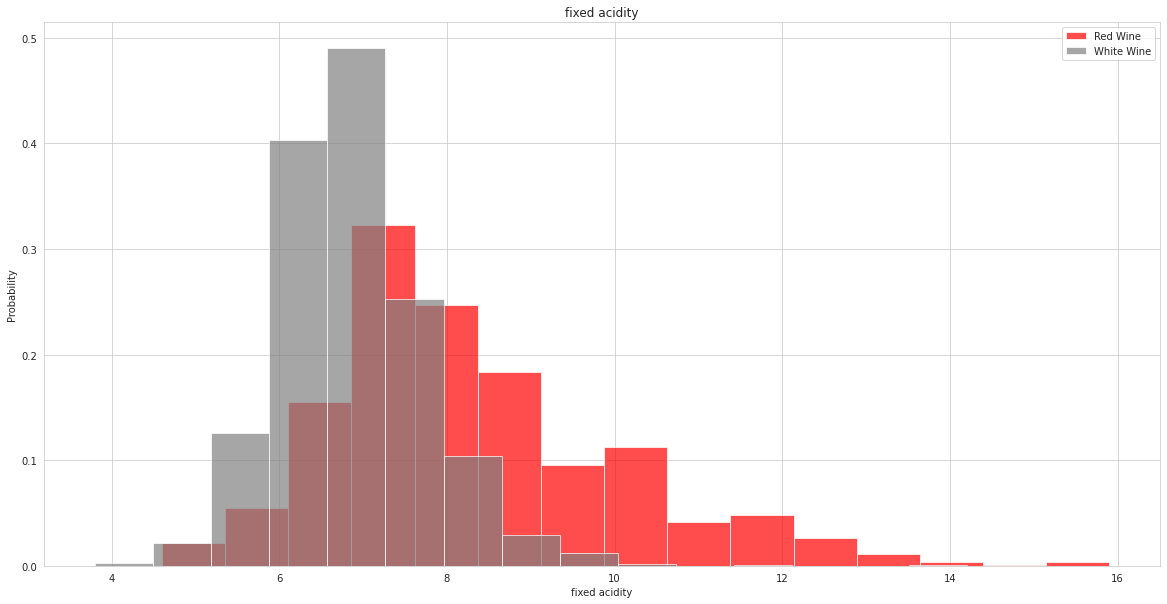

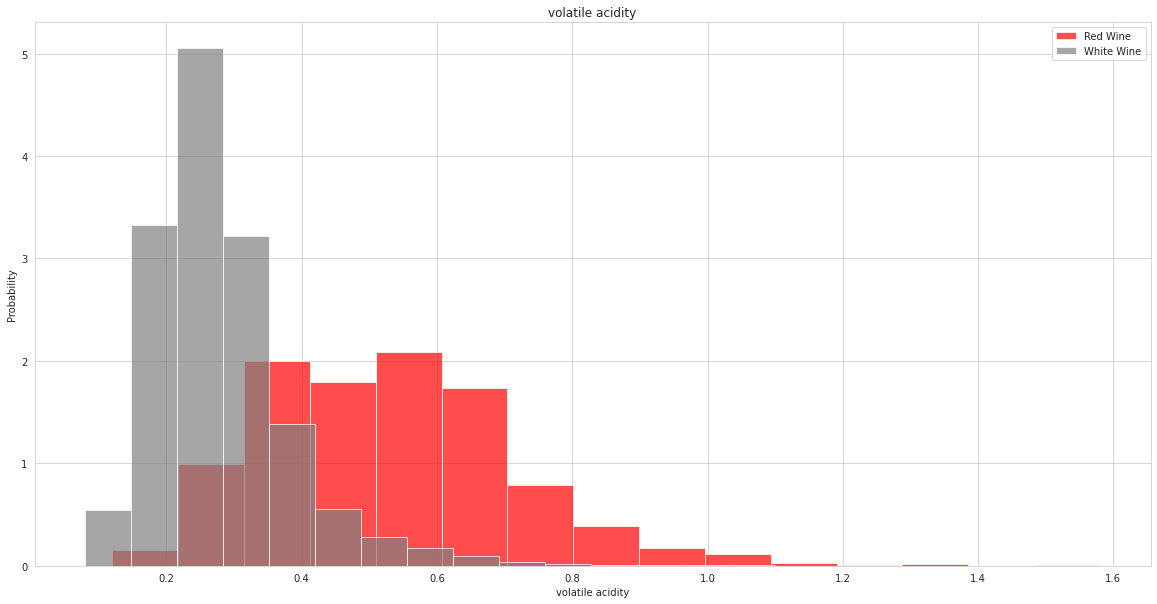

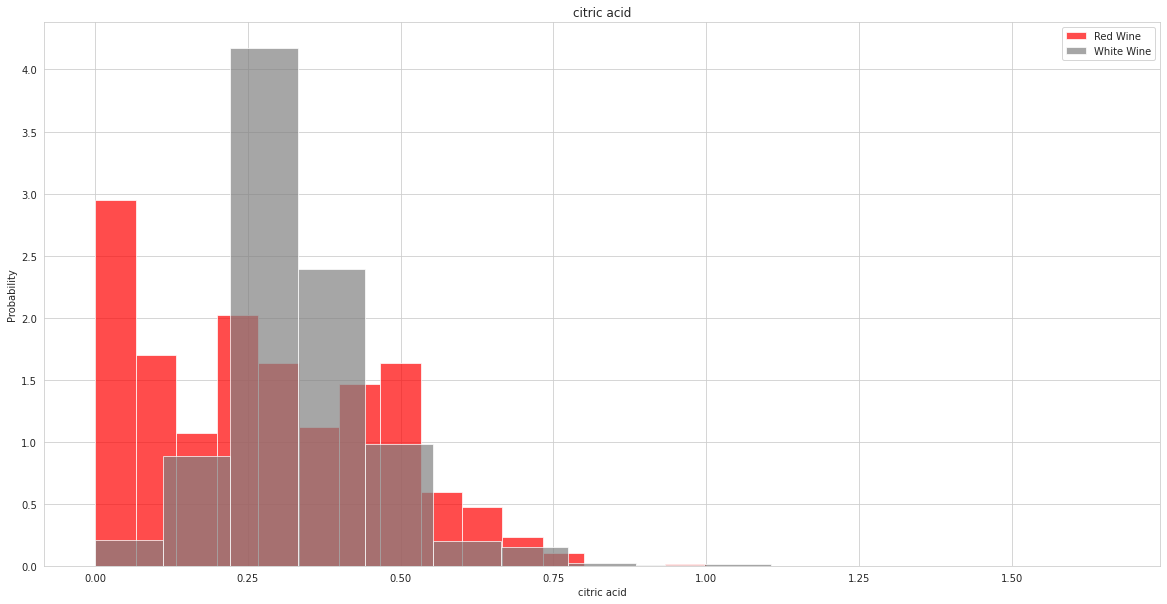

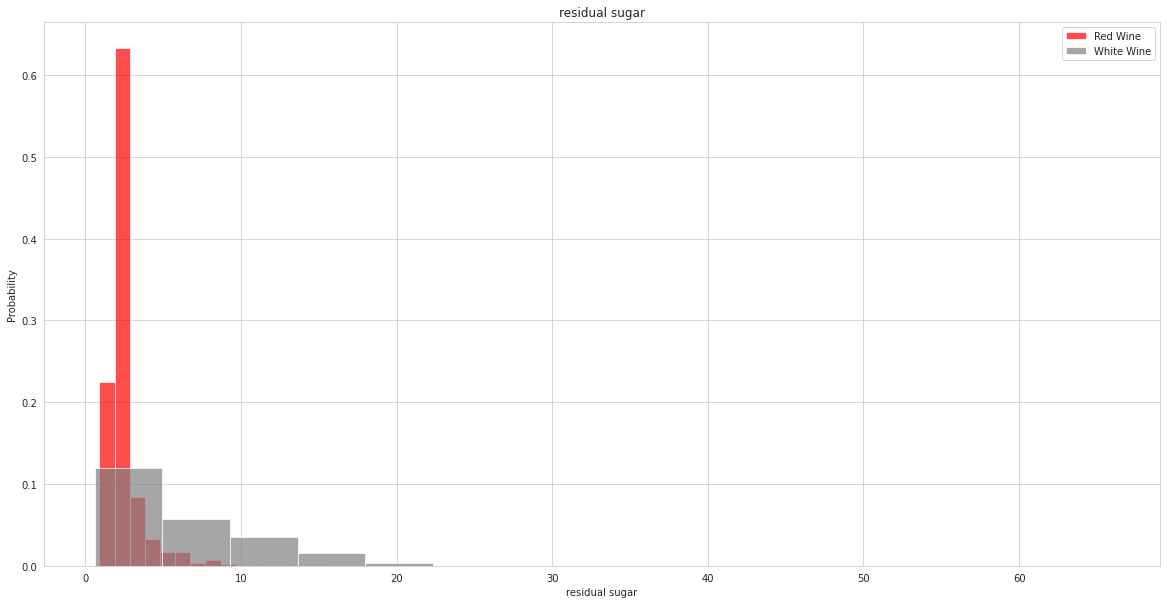

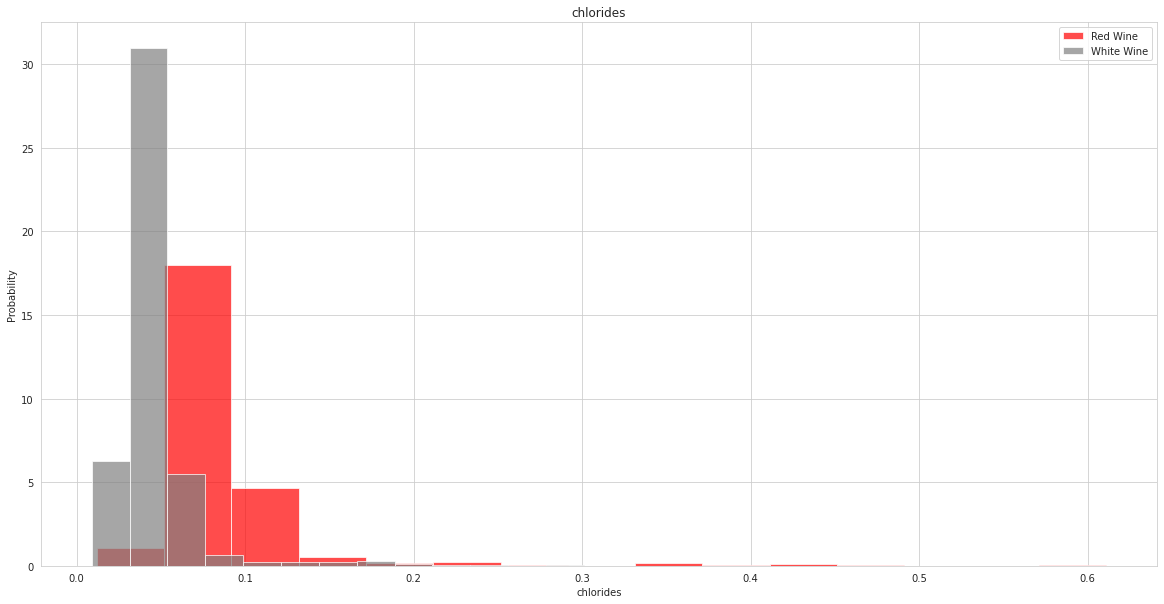

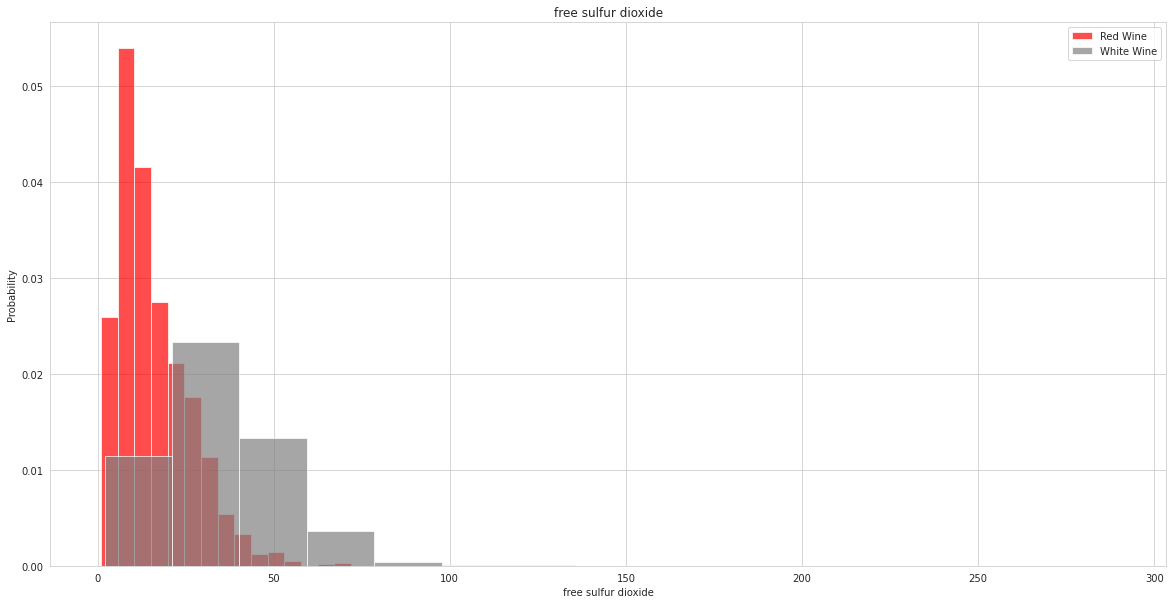

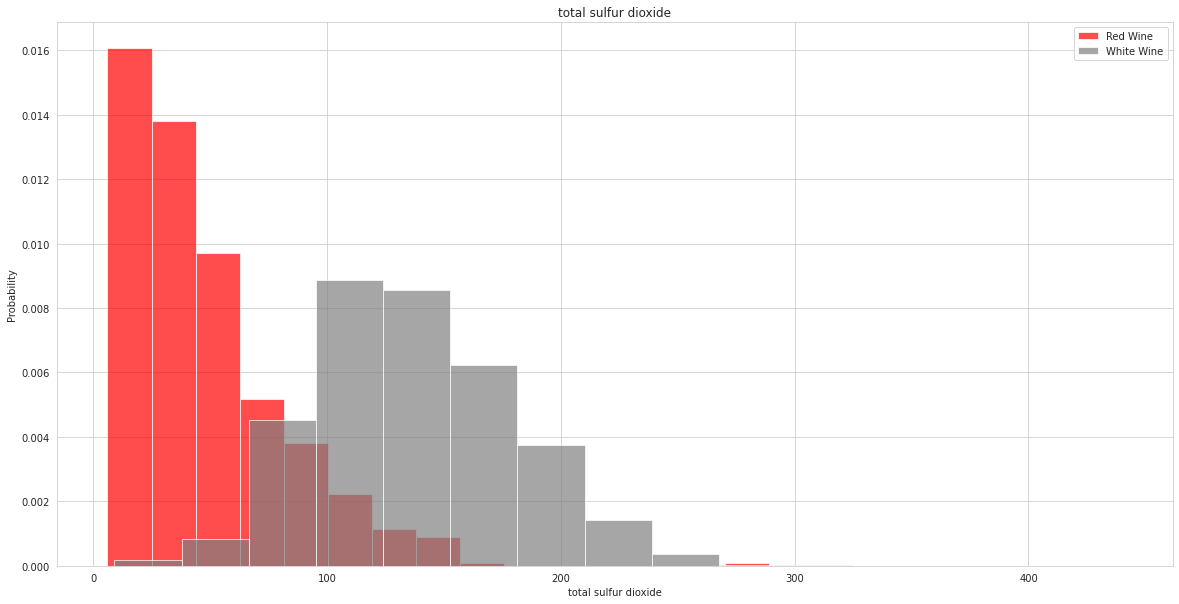

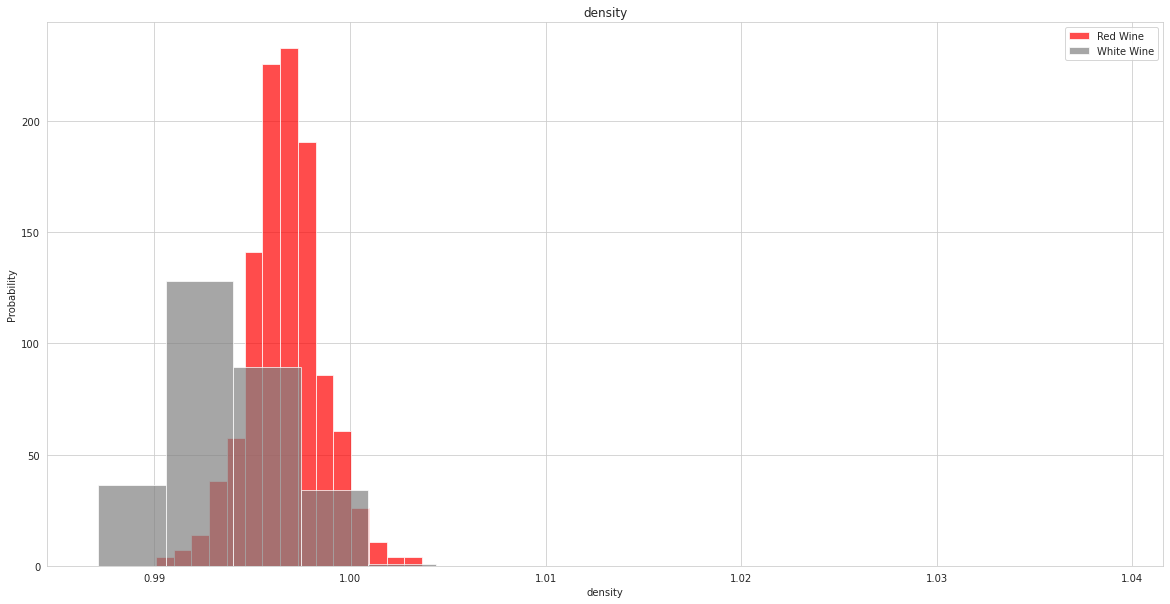

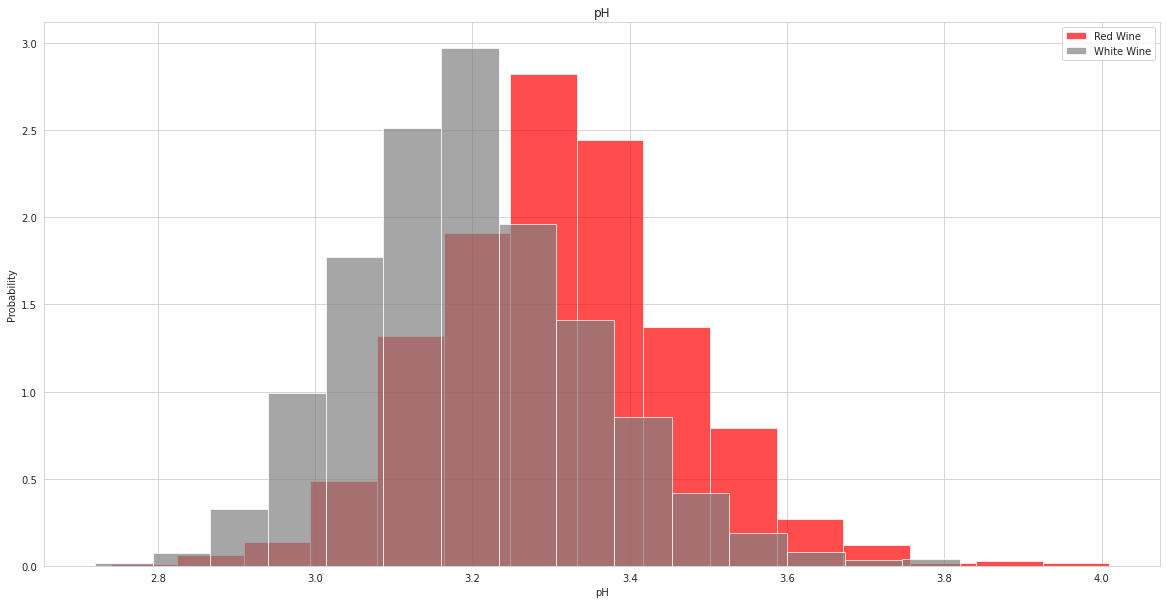

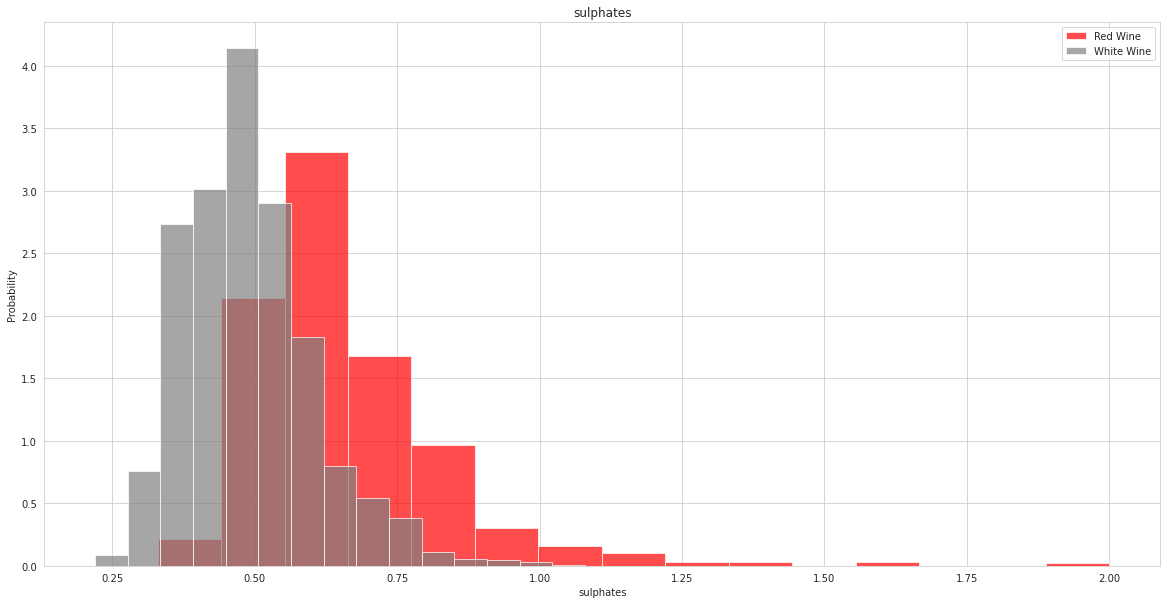

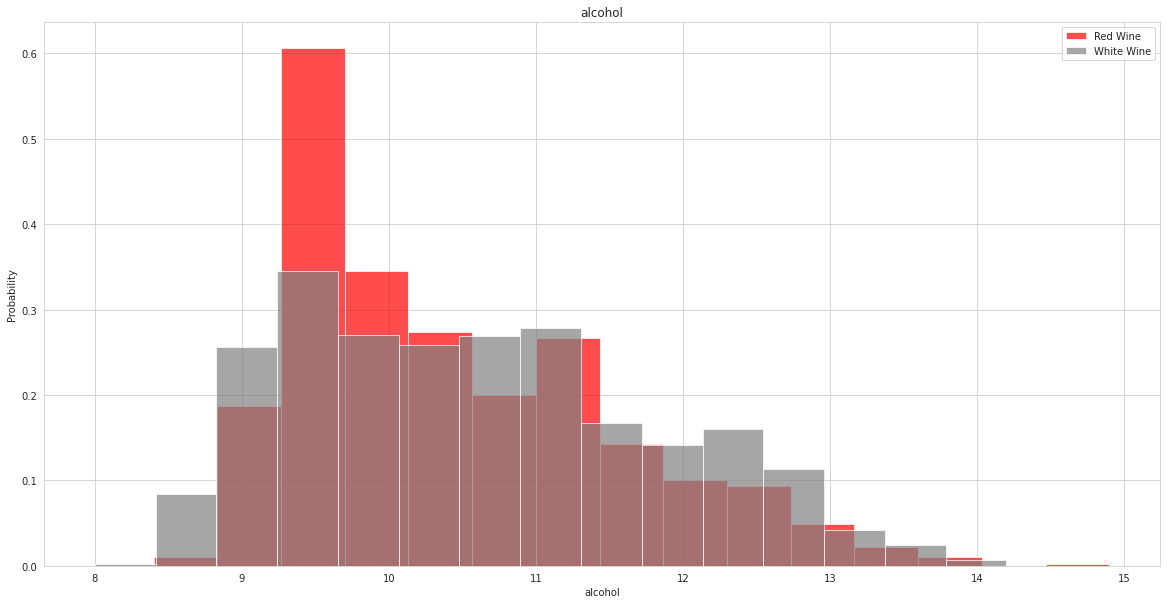

In [ ]:
for i in range(11):
  label = df.columns[i]
  plt.figure(figsize = (20, 10))
  plt.hist(df[df['is_red']==1][label], color='red', label="Red Wine", 
           alpha=0.7, density=True, bins=15) # Red Wine
  plt.hist(df[df['is_red']==0][label], color='gray', label="White Wine", 
           alpha=0.7, density=True, bins=15) # White Wine
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

<p>It's time to seperate our data as <i>dependent (Y)</i> and <i>independent(X)</i> variables.</p>

In [ ]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values  #.astype(float)
X[0:5]

array([[7.2000e+00, 1.7000e-01, 3.7000e-01, 6.9000e+00, 5.9000e-02,
        4.7000e+01, 1.2800e+02, 9.9322e-01, 3.0800e+00, 4.6000e-01,
        1.1000e+01],
       [1.2300e+01, 3.9000e-01, 6.3000e-01, 2.3000e+00, 9.1000e-02,
        6.0000e+00, 1.8000e+01, 1.0004e+00, 3.1600e+00, 4.9000e-01,
        9.5000e+00],
       [6.2000e+00, 2.7000e-01, 3.2000e-01, 6.3000e+00, 4.8000e-02,
        4.7000e+01, 1.5900e+02, 9.9282e-01, 3.2100e+00, 6.0000e-01,
        1.1000e+01],
       [7.7000e+00, 4.4000e-01, 2.4000e-01, 1.1200e+01, 3.1000e-02,
        4.1000e+01, 1.6700e+02, 9.9480e-01, 3.1200e+00, 4.3000e-01,
        1.1300e+01],
       [6.2000e+00, 3.9000e-01, 4.3000e-01, 2.0000e+00, 7.1000e-02,
        1.4000e+01, 2.4000e+01, 9.9428e-01, 3.4500e+00, 8.7000e-01,
        1.1200e+01]])

In [ ]:
Y = df['is_red'].values
Y[0:5]

array([0, 1, 0, 0, 1])

<p>Now, we have to normalize the data. Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:</p>

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.01150287, -1.03505419,  0.35003679,  0.41147166,  0.0626739 ,
         0.9528165 ,  0.2446935 , -0.44357453, -0.9020941 , -0.48993324,
         0.38012364],
       [ 3.85346092,  0.27266025,  2.11701932, -0.61080573,  0.93082718,
        -1.35011812, -1.69298761,  1.97782579, -0.40322942, -0.28957106,
        -0.88482226],
       [-0.7693389 , -0.44063854,  0.01023245,  0.27813113, -0.2357538 ,
         0.9528165 ,  0.79076726, -0.57847148, -0.09143899,  0.44509028,
         0.38012364],
       [ 0.36741515,  0.56986808, -0.53345448,  1.36707879, -0.69696023,
         0.61580168,  0.93168953,  0.08926844, -0.65266176, -0.69029543,
         0.63311282],
       [-0.7693389 ,  0.27266025,  0.75780199, -0.67747599,  0.38823138,
        -0.90076502, -1.58729592, -0.0860976 ,  1.40515506,  2.24834993,
         0.54878309]])

<br>

<h4>Test Train Split</h4>

<p>Creating train and test dataset Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing. Let's split our dataset into train and test sets. Around <i>80%</i> of the entire dataset will be used for training and <i>20%</i> for testing.</p>


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0) 

<br>

<a id="classification"></a>

<h2 align=center>Classification</h2>

<p>In this section, we are going to build classification models <i>(K-NN and Decision Tree)</i> for predicting wine class (red or white).

<br>

<h3>K-NN Classification</h3>

<p>In <i>statistics</i>, the <i>k-nearest neighbors algorithm</i> is a <i>non-parametric supervised learning</i> method first developed by <i>Evelyn Fix</i> and <i>Joseph Hodges</i> in 1951, and later expanded by <i>Thomas Cover</i>. It is used for <i>classification</i> and <i>regression</i>. In both cases, the input consists of the <i>k closest training</i> examples in a data set. (<a href='https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm'>Wikipedia</a>)</p>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

<p>Let's make some predictions!</p>

In [ ]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

<p>Now, let's take a look at our ground truth:</p>

In [ ]:
y_test[0:5]

array([0, 0, 0, 0, 0])

<p>It's time to build confusion matrix to see how strong our model.</p>

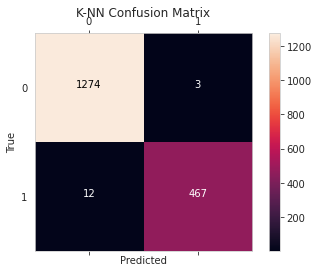

In [ ]:
plot_confusion_matrix(y_test, yhat, title='K-NN Confusion Matrix', labels=[0, 1])

<h4>What about other K?</h4>

<p><i>K</i> in <i>K-NN</i>, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for <i>K</i>? The general solution is to reserve a part of your data for testing the accuracy of the model. We can calculate the accuracy of <i>K-NN</i> for different values of k.</p>

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):

    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

mean_acc

array([0.98917995, 0.98917995, 0.99088838, 0.99145786, 0.99088838,
       0.99145786, 0.99088838, 0.99088838, 0.99145786])

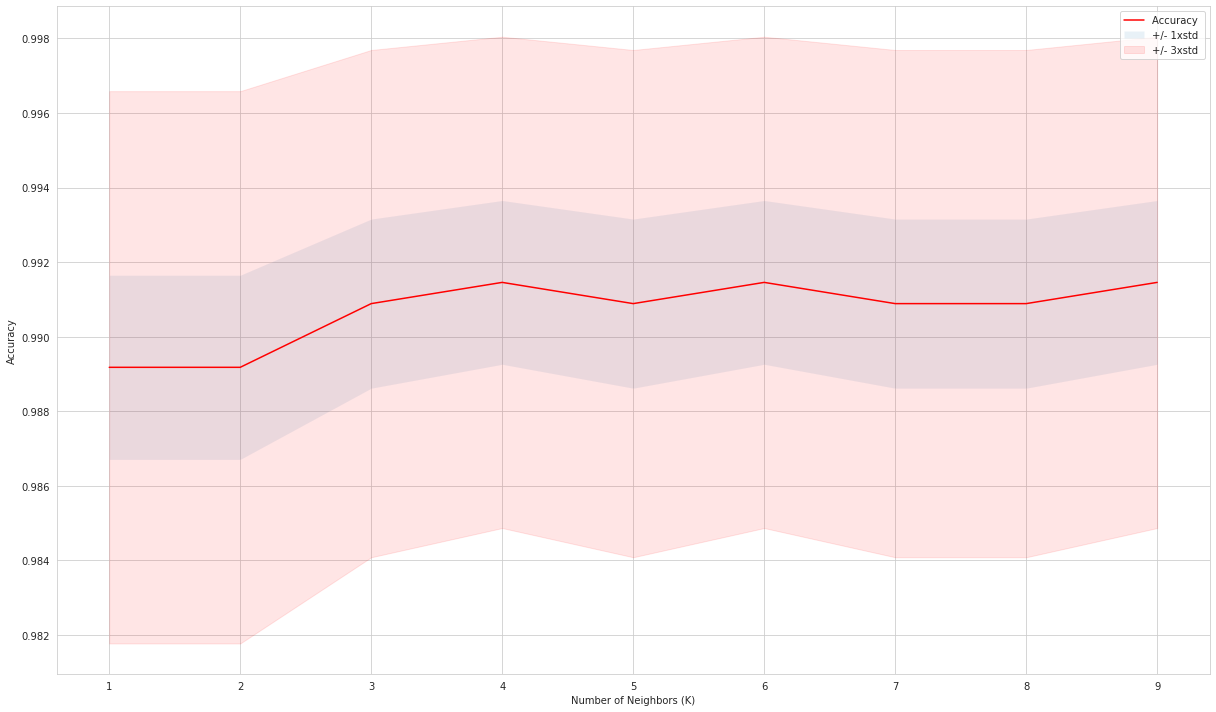

In [ ]:
plt.figure(figsize = (17, 10))
plt.plot(range(1, Ks), mean_acc, 'r')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="red")
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print(f"The best accuracy was with {mean_acc.max()} \
with k = {mean_acc.argmax() + 1}")

The best accuracy was with 0.9914578587699316 with k = 4


<p>Save the model with best parameter.</p>

In [ ]:
file_name = 'knn_model.sav'
pickle.dump(neigh, open(file_name, 'wb'))
 
# Load the K-NN Model
#loaded_model = pickle.load(open(file_name, 'rb'))

<br>

<h3>Decision Tree Classification</h3>

<p>A <i>decision tree</i> is a <i>decision support tool</i> that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements. (<a href='https://en.wikipedia.org/wiki/Decision_tree'>Wikipedia</a>)</p>

<p>We will first create an instance of the <i>DecisionTreeClassifier</i> called <code>wineTree</code>.
Inside of the classifier, specify <code>criterion="entropy"</code> so we can see the information gain of each node.</p>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
wineTree = DecisionTreeClassifier(criterion="entropy", max_depth=6)
wineTree

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [ ]:
wineTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

<p>Let's make some predictions for the decision tree model!</p>

In [ ]:
pred_tree = wineTree.predict(x_test)

In [ ]:
print(pred_tree[0:5])

[0 0 0 0 0]


<p>Let's take a look at our ground truth for decision tree:</p>

In [ ]:
print(y_test[0:5])

[0 0 0 0 0]


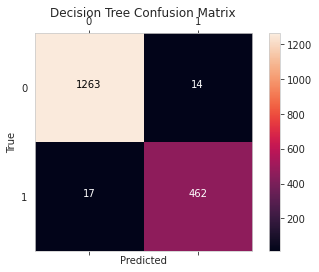

In [ ]:
plot_confusion_matrix(y_test, pred_tree, title='Decision Tree Confusion Matrix', labels=[0, 1])

<p>We can use Grid Search method for finding the best parameters.</p>

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
p = [{'criterion':['gini'],'splitter':['best'], 'max_depth':[1, 2, 3, 4, 5, 6, 7, 8]},
     {'criterion':['entropy'] ,'splitter':['random'], 'max_depth':[1, 2, 3, 4, 5, 6, 7, 8]},
     {'criterion':['gini'] ,'splitter':['random'], 'max_depth':[1, 2, 3, 4, 5, 6, 7, 8]},
     {'criterion':['entropy'] ,'splitter':['best'], 'max_depth':[1, 2, 3, 4, 5, 6, 7, 8]}]

In [ ]:
gs = GridSearchCV(estimator=wineTree,
                  param_grid=p,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

In [ ]:
grid_search = gs.fit(x_train, y_train)
best_result = grid_search.best_score_
best_parameters = grid_search.best_params_
print("\nGrid Search")
print("Best result:\n", best_result)
print("Best parameters:\n", best_parameters)


Grid Search
Best result:
 0.9840060986179617
Best parameters:
 {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}


<p>Save the model decision tree model.</p>

In [ ]:
file_name = 'dt_model.sav'
pickle.dump(neigh, open(file_name, 'wb'))
 
# Load the Decision Tree Model
#loaded_model = pickle.load(open(file_name, 'rb'))

<br>

<h1>Contact Me<h1>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [1]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2023-01-09 12:59:27
